#**Graded Challenge 2**
## **The analysis of Waste Collection & Diversion System for Austin Smart City, Texas TX**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Hana)

---
```
Table of Contents:
1. Objective
2. Problem Statement
3. Data Preparation
   3.1. Importing Libraries
   3.2. Dataset from BigQuery
   3.3. Data Type
   3.4. Central Tendency (original)
4. Data Cleaning
   4.1. Handing Missing Value
   4.2. Skewness
   4.3. Outliers
        - Outlier detection and removal using 3 standard deviation
5. Data Analysis
   5.1. Central Tendency (analysis)
   5.2. Analaysis for TDS Landfill
   5.3. Additional Site Proposal and Analysis
        - Distribution and Random Sample histograms
        - Hypothesis test: P-value and T-Test
        - Confidence Interval (CI 95%)
   5.4. Load Weight Prediction on July 10, 2021
6. Conclusion
   References
```

---
## **1. Objective**

As a member of Data Scientist group, Austin Smart City is currently having a project about waste and garbage system in the city. The data provided is based on [Waste Collection & Diversion Report (daily)](https://data.austintexas.gov/Utilities-and-City-Services/Waste-Collection-Diversion-Report-daily-/mbnu-4wq9), which is also provided on Google Cloud, BigQuery.

The analysis is to use data for `descriptive statistics`, which is a means of describing features of a data set by generating summaries about data samples. `Inferential statistics` which is the process of using data analysis to infer properties of an underlying distribution of probability. From those statistical analysis, as a data scientist, the governments demand to get insights of the system in Austin, Texas TX, that is about the current condition of waste collection and diversion system and the recommendation of waste collection's for adding new sites.

## **2. Problem Statement**

As the objectives mentioned above, the proposal should be following questions to be answered:

**1. What is the current condition of Austin's waste collection and diversion system?**\
This question will show about the existing site and current condition of the waste collection system, analyzed by `descriptive statistics`.

**2. Should Austin, Texas TX governments add new sites for the garbage collection for the whole city? If yes, what kind of new sites that are recommended? If no, explain the reason.**\
The analysis will be using `inferential statistics` and determined by `p-value` to know the probability to add new sites with the current and predicted condition. Moreover, `confidence interval (CI)` to study the recommended load capacity for the wastes and garbages, if the predicted condition to add new sites is possible.

---
## **3. Data Preparation**

**3.1. Importing libraries**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import sympy as sym
import sympy.printing as printing

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

**3.2. Dataset from BigQuery**

The dataset is availabe at `bigquery-public-data`, and taken from `austin_waste`, `waste_and_diversion`. After that, the query's result is saved and uploaded on github to get the raw data and loaded to notebook. The dataset provided should particularly shown: `report_date`, `load_time`, `load_type`, `load_weight`, `dropoff_site`. Below is the description of the query:


```
# Query for Waste and Diversion System #
-- Basic Data Cleaning
SELECT
  DISTINCT
  report_date,
  load_time,
  load_type,
  load_weight,
  dropoff_site,
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE
  report_date BETWEEN '2021-01-01' AND '2022-07-09'
ORDER BY report_date ASC;
```

In [2]:
url = 'https://github.com/nadiaoktiarsy/hacktiv8_p0/blob/main/p0_week2/h8dsft_P0GC2_nadia_oktiarsy/h8dsft_P0GC2_nadia_oktiarsy.csv?raw=true'
df = pd.read_csv(url)

In [3]:
len(df)

25712

In [4]:
df.shape

(25712, 5)

In [5]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
2,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
3,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
4,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF


In [6]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
25707,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
25708,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
25709,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
25710,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
25711,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


**3.3. Data Type**\
Data study is to understand what kind of data available by grouping them. For example, we can see the site based on load type, which will be shown as below using `.groupby()`:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25712 entries, 0 to 25711
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   25712 non-null  object 
 1   load_time     25712 non-null  object 
 2   load_type     25712 non-null  object 
 3   load_weight   25083 non-null  float64
 4   dropoff_site  25712 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1004.5+ KB


In [8]:
# Finding drop-off site grouped by load type
df.groupby(['load_type'])['dropoff_site'].agg(pd.Series.mode)

load_type
BRUSH                                 HORNSBY BEND
BULK                                  TDS LANDFILL
CONTAMINATED ORGANICS                 TDS LANDFILL
CONTAMINATED RECYCLING                TDS LANDFILL
DEAD ANIMAL                           TDS LANDFILL
GARBAGE COLLECTIONS                   TDS LANDFILL
LITTER                                TDS LANDFILL
MIXED LITTER                          TDS LANDFILL
ORGANICS                          ORGANICS BY GOSH
RECYCLED METAL               AUSTIN IRON AND METAL
RECYCLING - SINGLE STREAM       BALCONES RECYCLING
SWEEPING                               ONION CREEK
TIRES                                          MRF
YARD TRIMMING                         HORNSBY BEND
Name: dropoff_site, dtype: object

In [9]:
# Finding load type grouped by drop-off site
df.groupby(['dropoff_site'])['load_type'].agg(pd.Series.mode)

dropoff_site
AUSTIN IRON AND METAL               RECYCLED METAL
AUSTIN WOOD RECYCLING    RECYCLING - SINGLE STREAM
BALCONES RECYCLING       RECYCLING - SINGLE STREAM
BALCONES WOODS           RECYCLING - SINGLE STREAM
GREAT NORTHERN                            SWEEPING
HORNSBY BEND                                 BRUSH
MRF                                          TIRES
ON ROUTE HIGH DUMP                        SWEEPING
ONION CREEK                               SWEEPING
ORGANICS BY GOSH                          ORGANICS
PARK BEND                                 ORGANICS
PARK CENTER                               SWEEPING
ST. EDWARDS                               SWEEPING
STEINER LANDFILL               GARBAGE COLLECTIONS
TDS - MRF                RECYCLING - SINGLE STREAM
TDS LANDFILL                   GARBAGE COLLECTIONS
WESTFIELD                      GARBAGE COLLECTIONS
WILCAB                                    SWEEPING
Name: load_type, dtype: object

In [10]:
# Counting number of values in dropoff_site column
df["dropoff_site"].value_counts()

TDS LANDFILL             10687
ORGANICS BY GOSH          5746
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1651
ONION CREEK                396
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 74
GREAT NORTHERN              69
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

In [11]:
# Counting number of values in load_type column
df["load_type"].value_counts()

GARBAGE COLLECTIONS          8236
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5754
BULK                         1594
BRUSH                        1513
SWEEPING                      971
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

**3.4. Central Tendency (mean, median, dan mode)**

Central tendency will describe the mean, median, and mode of the original dataset. However, we still can not see the correct insight because the original dataset has not been cleaned.

In [12]:
# Finding mean of the original dataset
df['load_weight'].mean()

12229.467190503528

In [13]:
# Finding median of the original dataset
df['load_weight'].median()

11300.0

In [14]:
# Finding mode of the original dataset
df['load_weight'].mode()

0    5500.0
dtype: float64

---
## **4. Data Cleaning**

This part will explain data cleaning process especially about handling missing value, finding skewed data, and handling outliers (extreme values).

**4.1. Handing Missing Value**

Null values (NaN) are apparently only existing in `load_weight` column. So, to check further and prove how many null values, we can use `.isnull().sum()`. The result should be in total `629`, and we can see that `load_weight` has also total null values `629`.

There are at least more than one method to handle missing value.

`The first method` is by removing all rows with NaN values. Considering there are `629` null values from `25,712` rows, that means null values are only about `2.5%` which is probabily low to affect the analysis result. Assume we can remove those null values, because the impact of the data later would not be as huge. **However, we need to evaluate the discrepancy before and after NaN value being removed**. If the discrepancy is too significant and affecting the results, then we should consider to move on to the second method.

`The second method` is by subtituting all rows with NaN values with `median` or `mean` of load weight. This aims to keep some missing values with mean based on original data. However, this should be noted that the subtitution missing value should be based on **skewness**.

In [15]:
#Find the total number of missing values from the entire dataset
df.isnull().sum()

report_date       0
load_time         0
load_type         0
load_weight     629
dropoff_site      0
dtype: int64

In [16]:
# drop all rows with any NaN and NaT values, define new dataframe with new name
df_dropna = df.dropna()
df_dropna

,report_date,load_time,load_type,load_weight,dropoff_site
1,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
2,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
3,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
4,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
6,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
25707,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
25708,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
25709,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
25710,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [17]:
# checking df_austin to make sure null is 0
df_dropna.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

In [18]:
# Counting number of values in dropoff_site column
df_dropna["dropoff_site"].value_counts()

TDS LANDFILL             10684
ORGANICS BY GOSH          5732
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1648
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

In [19]:
# Counting number of values in load_type column
df_dropna["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

**The second method:** The result after removing null values is different from the original dataset. There are four kinds of drop-off site being removed and no longer listed on the new and cleaned dataset, such as:
```
"ONION CREEK", from  396 to 0
"ST.EDWARDS", from 1 to 0
"WILCAB", from 1 to 0
"PARK CENTER", from 74 to 0
```

This has raised a question: should we keep omitting these removed sites or subtitute them with other values rather than Null?

As hypotheses are about waste location, **it is important not to remove those four waste collection sites**. Assume that `Onion Creek`, `St. Edwards`, `Wilcab`, and `Park Center` have the same value like median, the subtitution of null value to the original dataset with `median` of `load_weight`. Thus, the number of sample will be the same with the original dataset: `25,712`.

The result of the subtitution will be:

In [20]:
# Replacing NaN for one column using pandas:
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
1,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
2,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
3,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
4,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
...,...,...,...,...,...
25707,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
25708,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
25709,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
25710,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


**4.2. Skewness**

Skewnesss refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. The skeweness based on data can be categorized as `right skewed`, which means the dataset skew more than 50% (or >0.5). This is important to take note that the data cleaning for empty or null values should be subtituted by **median** instead of mean, especially after seeing the result of skewness is **right skewed**.

In [21]:
# Creating a function to print the skewness
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    # print(f'\'{data.name}\'kurtosis: {data.kurt()}')
    if data.skew() > 0.5:
        print ('Right skewed')
    elif data.skew() < -0.5:
        print( 'Left Skewed')
    else:
        print("Normal Distribution")


In [22]:
# Creating a function to visualize the data
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=150, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Probability Density')
    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

    # label the plot
    plt.legend(['Normal PDF(Probability Density Function) ', 'Histogram: Load Weight'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2)
    plt.show()

'load_weight' skewness: 3.3872609016486726
Right skewed


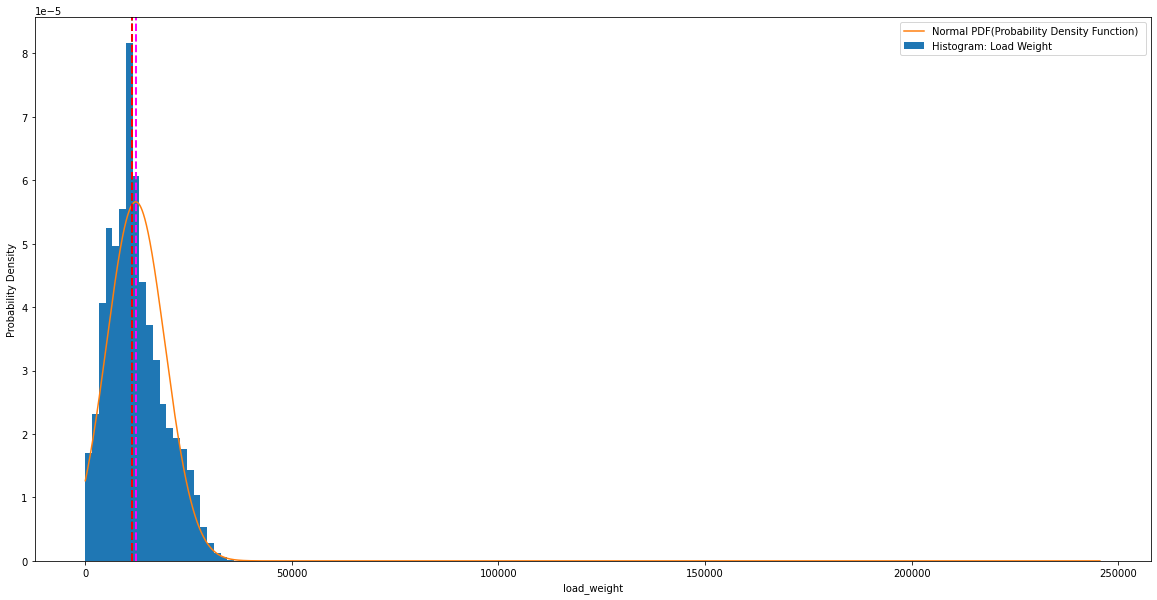

In [23]:
# Visualizing skewed data
visualize_data(df.load_weight)

**4.3. Outliers**

Outliers are extreme numbers that can make the dataset less accurate. Because of this extremeness, it should be excluded or removed. Below is a boxplot that shows how extreme the original dataset that still has outliers. Maximum number in the dataset is literally `245440` which is too far from the mean `12206.73` and standard deviation `7049`.

Fences are used to illustrate extreme values (outliers) in box plots. The fences are indicated by `upper limit`and `lower limit`. The definitions for the outer and inner fences only represent the maximum value where the whiskers could go, if the data set actually contained those values.

In [24]:
df.describe()

,load_weight
count,25712.000000
mean,12206.729369
std,7049.014324
min,0.000000
25%,7200.000000
50%,11300.000000
75%,16185.000000
max,245540.000000


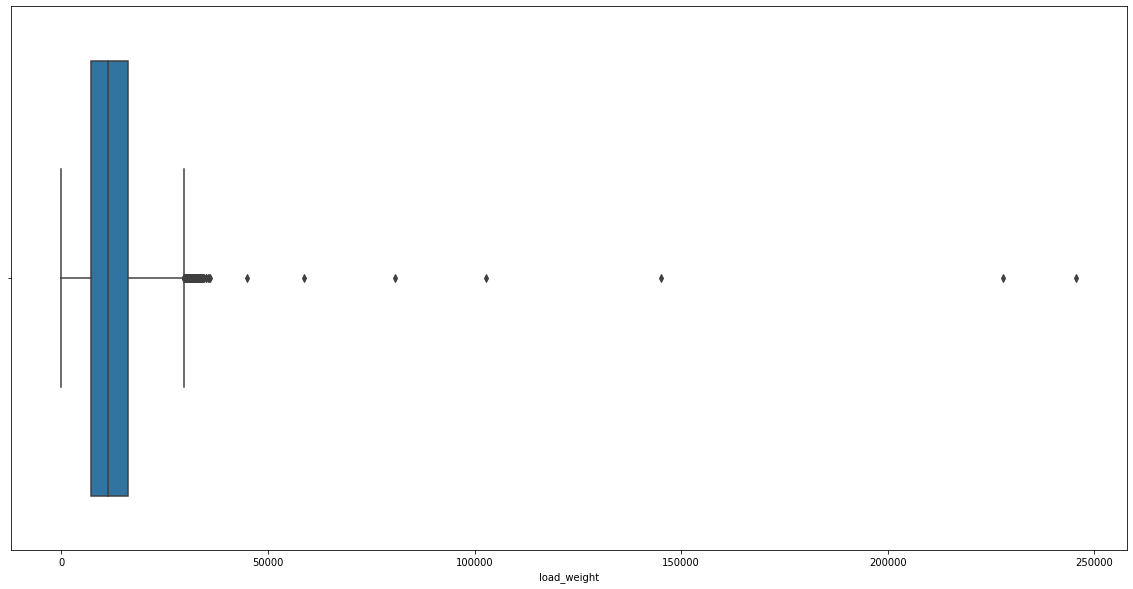

In [25]:
# Checking outliers, with the maximum extreme value 245440
sns.boxplot(x = df['load_weight'])
plt.show()

**Handling Outliers:**\
There are three methods for handling outliers:
1. Outlier detection and removal using 3 standard deviation
2. Outlier detection and removal using Z Score
3. Outlier detection and removal using IQR

However, in this case, the outlier will be detected and removed by using the first method, which is using 3 standard deviation.

**Outlier detection and removal using 3 standard deviation**

In [26]:
# Outliers detection and removal using 3 standards deviation
df['load_weight']

0        11300.0
1         1640.0
2          940.0
3          320.0
4          520.0
          ...   
25707     8240.0
25708     4160.0
25709     4340.0
25710     1900.0
25711     3040.0
Name: load_weight, Length: 25712, dtype: float64

In [27]:
df['load_weight'].var()

49688602.94321622

In [28]:
df['load_weight'].std()

7049.01432423117

In [29]:
# Calculating Upper Limit Fence
upper_limit = df.load_weight.mean() + 3*df.load_weight.std()
upper_limit

33353.772341836324

In [30]:
# Calculating Lower Limit Fence
lower_limit = df.load_weight.mean() - 3*df.load_weight.std()
lower_limit

-8940.3136035507

The table below shows `26 outliers` with some numbers which are not consistent with other values at `load_weight` column. For example, **if these extreme values have numbers more than the upper limit which is `33353.77`, then we can say these extreme values are too far out of the fence upper limit**. These extreme values should be excluded from the dataset because they could have reduced the accuracy of the result in the data analysis.

In [31]:
# outliers which are outside the 3 std
df[(df.load_weight>upper_limit) | (df.load_weight<lower_limit)]

,report_date,load_time,load_type,load_weight,dropoff_site
824,2021-01-07,2021-01-07 02:45:00 UTC,GARBAGE COLLECTIONS,44980.0,TDS LANDFILL
5096,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL
5827,2021-02-22,2021-02-22 05:36:00 UTC,GARBAGE COLLECTIONS,33480.0,TDS LANDFILL
5836,2021-02-22,2021-02-22 07:39:00 UTC,GARBAGE COLLECTIONS,35900.0,TDS LANDFILL
6075,2021-02-23,2021-02-23 01:56:00 UTC,GARBAGE COLLECTIONS,35040.0,TDS LANDFILL
6099,2021-02-23,2021-02-23 05:09:00 UTC,GARBAGE COLLECTIONS,33480.0,TDS LANDFILL
6259,2021-02-24,2021-02-24 01:45:00 UTC,GARBAGE COLLECTIONS,33820.0,TDS LANDFILL
6260,2021-02-24,2021-02-24 03:38:00 UTC,GARBAGE COLLECTIONS,34340.0,TDS LANDFILL
6276,2021-02-24,2021-02-24 02:30:00 UTC,GARBAGE COLLECTIONS,34080.0,TDS LANDFILL
6520,2021-02-25,2021-02-25 12:58:00 UTC,GARBAGE COLLECTIONS,33560.0,TDS LANDFILL


In [32]:
# removing outlier and checking its head()
df_no_outlier_std_dev = df[(df.load_weight<upper_limit) & (df.load_weight>lower_limit)]
df_no_outlier_std_dev

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
1,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
2,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
3,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
4,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
...,...,...,...,...,...
25707,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
25708,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
25709,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
25710,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


**To make sure this outliers removal is working**, we should check on the number of rows and columns of dataframe without outliers and with outliers. The difference total should be `26` which is the same as the list of table of outliers.

In [33]:
# Chekcing df after removing outliers
df_no_outlier_std_dev.shape

(25686, 5)

In [34]:
# Comparing df after removing outliers with the original dataframe
df.shape

(25712, 5)

In [35]:
# The rows difference between original dataset and dataset after outliers removal is 26:
25712-25686

26

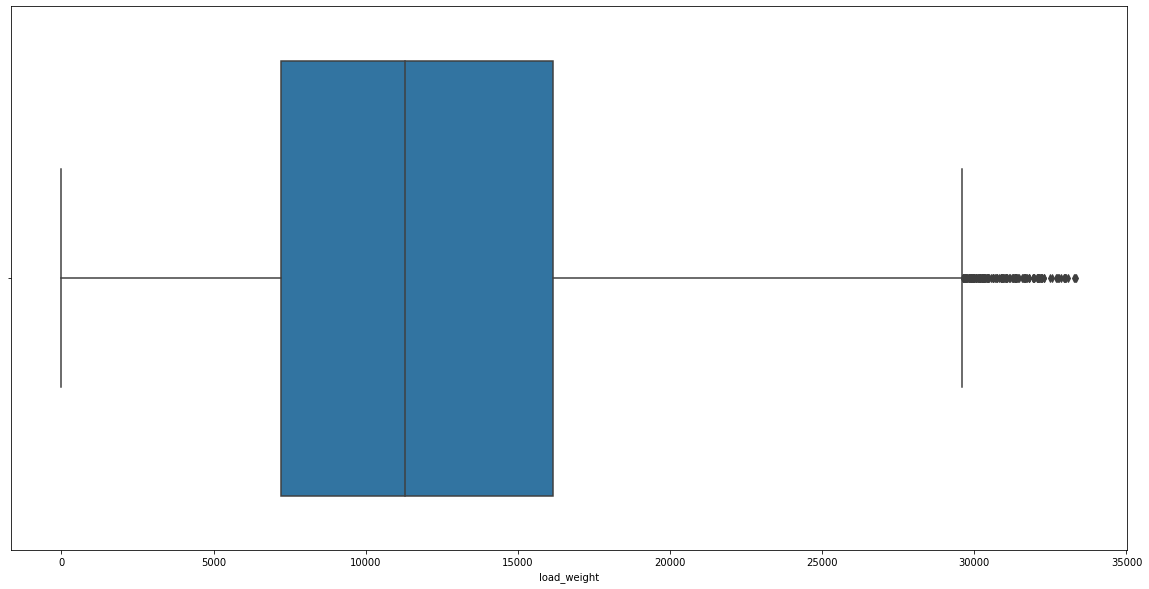

In [36]:
# Checking outliers at boxplot below
sns.boxplot(x = df_no_outlier_std_dev['load_weight'])
plt.show()

In [37]:
# Renaming long dataframe name with the short one, and checking the central tendency
df_austin = df_no_outlier_std_dev
df_austin.describe()

,load_weight
count,25686.000000
mean,12158.487446
std,6643.193203
min,0.000000
25%,7200.000000
50%,11300.000000
75%,16160.000000
max,33340.000000


These outliers are removed and we get this boxplot and see the difference that there is no value with a huge number such as `245540` from `TDS LANDFILL`. We can even see the new maximum result of the dataset is `33340`. However, we must remember that the average of load_weight after the outliers removal is changed, so is standard deviation.

- Average before outliers removal: `12206.72`
- Average after outliers removal: `12158.49`
- Standard deviation before outliers removal: `7049.01`
- Standard deviation after outliers removal: `6642.19`

**From here, the dataset should be fine to be proceed to the data analysis.**

---
## **5. Data Analysis**

For the context of analysis, the data will be categorized daily and monthly to see the central tendency of waste system, and to analyze if the current system should be on going or changed.
- January 2021
- February 2021
- March 2021
- April 2021
- May 2021
- June 2021 - July 9th, 2021

**5.1. Central Tendency for analysis**

In [38]:
# Finding mean after outliers and missing value from dataset are cleaned
mean_austin = df_austin['load_weight'].mean()
mean_austin

12158.487446056217

*a) Average load weight in January 2021*

In [39]:
# Mean in January 2022
df_jan = df_austin[(df_austin['report_date'] >= '2021-01-01') & (df_austin['report_date'] <= '2021-01-31')]
mean_jan = df_jan['load_weight'].mean()
mean_jan

12116.917701863355

In [40]:
df_mean_jan = df_jan.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_jan.sort_index()
df_mean_jan = df_mean_jan.set_index("dropoff_site")

*b) Average load weight in February 2021*

In [41]:
# Mean in February 2022
df_feb = df_austin[(df_austin['report_date'] >= '2021-02-01') & (df_austin['report_date'] <= '2021-02-28')]
mean_feb = df_feb['load_weight'].mean()
mean_feb

12222.65180878553

In [42]:
df_mean_feb = df_feb.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_feb.sort_index()
df_mean_feb = df_mean_feb.set_index("dropoff_site")

*c) Average load weight in March 2021*

In [43]:
# Mean in March 2022
df_mar = df_austin[(df_austin['report_date'] >= '2021-03-01') & (df_austin['report_date'] <= '2021-03-31')]
mean_mar = df_mar['load_weight'].mean()
mean_mar

12032.578645499361

In [44]:
df_mean_mar = df_mar.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_mar.sort_index()
df_mean_mar = df_mean_mar.set_index("dropoff_site")

*d) Average load weight in April 2021*

In [45]:
# Mean in April 2022
df_apr = df_austin[(df_austin['report_date'] >= '2021-04-01') & (df_austin['report_date'] <= '2021-04-30')]
mean_apr = df_apr['load_weight'].mean()
mean_apr

11944.942213970759

In [46]:
df_mean_apr = df_apr.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_apr.sort_index()
df_mean_apr = df_mean_apr.set_index("dropoff_site")

*e) Average load weight in May 2021*

In [47]:
# Mean in May 2022
df_may = df_austin[(df_austin['report_date'] >= '2021-05-01') & (df_austin['report_date'] <= '2021-05-31')]
mean_may = df_may['load_weight'].mean()
mean_may

12401.762957317073

In [48]:
df_mean_may = df_may.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_may.sort_index()
df_mean_may = df_mean_may.set_index("dropoff_site")

*f) Average load weight in June-July 2021*

In [49]:
# Mean in June 2021
df_june = df_austin[(df_austin['report_date'] >= '2021-06-01') & (df_austin['report_date'] <= '2021-06-30')]
mean_june = df_june['load_weight'].mean()
mean_june

12407.359028824834

In [50]:
df_mean_june = df_june.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_june.sort_index()
df_mean_june = df_mean_june.set_index("dropoff_site")

In [51]:
# Mean in July 9th 2021
df_july = df_austin[(df_austin['report_date'] >= '2021-06-01') & (df_austin['report_date'] <= '2021-07-09')]
mean_july = df_july['load_weight'].mean()
mean_july

12281.231074740208

In [52]:
df_mean_july = df_july.groupby('dropoff_site', as_index=False).load_weight.mean()
df_mean_july.sort_index()
df_mean_july = df_mean_july.set_index("dropoff_site")

*g) Comparing average load weight from January to July 2021*

In [53]:
# Making comparison of means by defining dataframe `df_mean`
df_mean = pd.concat([df_mean_jan, df_mean_feb, df_mean_mar, df_mean_apr, df_mean_may, df_mean_june, df_mean_july], keys=["january", "february", "march", "april", "may", "june", "July (only 1st-9th)"], axis=1)
df_mean = df_mean.sort_index()
df_mean

,january,february,march,april,may,june,July (only 1st-9th)
,load_weight,load_weight,load_weight,load_weight,load_weight,load_weight,load_weight
dropoff_site,,,,,,,
AUSTIN IRON AND METAL,487.500000,378.000000,496.250000,426.250000,519.166667,410.000000,393.076923
AUSTIN WOOD RECYCLING,NaN,2340.000000,NaN,NaN,NaN,5760.000000,5760.000000
BALCONES RECYCLING,9800.585652,9127.795100,9388.767507,9332.808824,9569.118644,9572.028986,9471.759777
BALCONES WOODS,NaN,NaN,NaN,8460.000000,NaN,NaN,NaN
GREAT NORTHERN,NaN,19215.000000,11300.000000,11300.000000,11477.575758,14500.000000,14500.000000
HORNSBY BEND,8856.625514,5215.141956,5965.775076,6638.253275,6110.421053,7534.641509,7352.303207
MRF,1782.142857,2319.130435,1326.666667,1798.952381,1833.051282,1627.142857,1623.958333
ON ROUTE HIGH DUMP,11300.000000,11300.000000,12773.333333,11260.000000,11300.000000,11293.333333,11293.793103


The averages load weight based on waste collections sites have some **empty data**, indicated by `NaN`, which means **there are no waste load being dropped to the certain sites during that month**. For example, in January, there is no waste being dropped to `Austin Wood Recycling`.

- `Austin Wood Recycling` happens twice per semester, which is in `February` and `June`.
- `Geat Northern` only happens once per semester (in `April`).
- `Park Bend` happens every two months with two months break (`February-March`, and `June-July`).
- `St. Edwards` only happens once per semester (in `June`).
- `Steiner Landifll` is only in `April`.
- `Westfield` is only in `May`.
- `Wilcab` is only in `January`.

**The current shift schedules for waste collection and diversion system are important to be applied in the future**, as we can see the load average are about the same, with the overal average results: `12158.48`, as mentioned at the average calculation of after cleaning the data.

Average load weight (pounds) for first semester of 2021:
- January 2021: `12158.49`
- February 2021: `12222.65`
- March 2021: `12032.59`
- April 2021: `11944.94`
- May 2021: `12401.76`
- June 2021: `12407.36`
- July 2021 (until 9th): `12281.23`

*h) Median from January to June-July 2021*

The median is to approximate average, or mean, however it is not the average itself. As we can see from the calculation below, median of each month is actually below average although it is not too far. For example, this can be proposed as the minimum capacity of `load_weight`.

In [54]:
# Median January 2021
df_jan['load_weight'].median()

11250.0

In [55]:
# Median February 2021
df_feb['load_weight'].median()

11260.0

In [56]:
# Median March 2021
df_mar['load_weight'].median()

11320.0

In [57]:
# Media April 2021
df_apr['load_weight'].median()

10980.0

In [58]:
# Median May 2021
df_may['load_weight'].median()

11460.0

In [59]:
# Median June-July 2021
df_june['load_weight'].median()

11360.0

**5.2. Analysis for TDS Landfill (Center Tendency, Range, Standard Deviation, Variance)**

The next analysis is about the comparison of center tendency between TDS Landfill as the chosen collection site and overall waste collection sites.

Standard deviation tells you how spread out the data is. It is a measure of how far each observed value is from the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. Meanwhile, variance is a statistical measurement used to determine how far each number is from the mean and from every other number in the set. It is also the degree of spread in the data set.

In [60]:
# Average of overall load weight
df_austin['load_weight'].mean()

12158.487446056217

In [61]:
# Standard deviation
df_austin['load_weight'].std()

6643.193202741139

In [62]:
# Variance
df_austin['load_weight'].var()

44132015.92894608

In [63]:
# Range (max - min)
df_austin['load_weight'].max() - df_austin['load_weight'].min()

33340.0

*TDS Landfill Center Tendency*

TDS Landfill will be the chosen site to discuss about its center tendency based on the high number of data that are input to the dataset, which is `10661` rows.

In [64]:
# Create new dataframe based on states in the chosen site: TDS Landfill
df_tdsland = df_austin[(df_austin['dropoff_site'] == 'TDS LANDFILL')]
df_tdsland

,report_date,load_time,load_type,load_weight,dropoff_site
11,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
12,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
13,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
14,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
15,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
...,...,...,...,...,...
25657,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL
25658,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL
25659,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL
25710,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [65]:
# Average TDS Landfill
df_tdsland['load_weight'].mean()

15058.419992439734

In [66]:
# Standard deviation TDS Landfill
df_tdsland['load_weight'].std()

7818.611685758817

In [67]:
# Variance
df_tdsland['load_weight'].var()

61130688.69268432

In [68]:
# Range (max - min)
df_tdsland['load_weight'].max() - df_tdsland['load_weight'].min()

33340.0

By comparing the center tendency of TDS Landfill with overall waste collection sites (including TDS Landfill), the result is different that overal waste collection sites. TDS Landfill center tendency tends to have a higher result than overall waste collection sites.

>Overall Waste Collection Sites:
- Average: `12158.49` pounds
- Standard deviation: `6643.19`
- Variance: `61130688.69`
- Range (max-min): `33340.0` pounds

>TDS Landfill: 
- Average: `15058.42` pounds
- Standard deviation: `7818.61`
- Variance: `44132015.92`
- Range (max-min): `33340.0` pounds

The high number of average loaded in TDS Landfill can be the sign that **TDS Landfill is the main waste collection site in Austin**. This can be useful as a reference for government to provide TDS Landfill and approximate the average load for the new TDS Landfill.

**5.3. Additional Site Proposal (p-value, confidence interval 90%)**

Austin Smart City is still on-going, waste collection and diversion system should be evaluated as the potency of people urbanizing to Austin will be increasing in the last six months in 2021. Assume that the load of wastes are also increasing, meanwhile the first six month of 2021 has `the capacity average about 12,000 pounds`. Thus, it is important to analyze if the waste collection site should be added or not. However, is the average capacity has a significant increase in the first semester of 2021?

To check if the average of load is increasing or not, the analysis will use the single sample one-sided and set `the significance level on 0.05`. The significance means the test hypothesis is false or should be rejected if the probability value (later will be writen as p-value) is less than 0.05, or we can say it is unlikely to have occurred. If the significance is higher than 0.05, the goverments should add new site for waste collection.

As the hypothesis on this case:
```
H0 (p-value < 0.05): There is no significant change from load weight average -> not recommend to add new site
H1 (p-value > 0.05): There is a significant change from load weight average -> failed not to recommend to add new site
```


*a) Distribution and Random Sample histograms*

There are two histograms that tell us about the number of load capacity in Austin. The first one is the general distribution of overall load capacity. Meanwhile the second histogram tells us about the random sample we will take to test the hypotesis. For example, we take `300 random samples` to test the hypothesis, and then we try to see the visualization which shows that the distribution and random sample are basically the same.

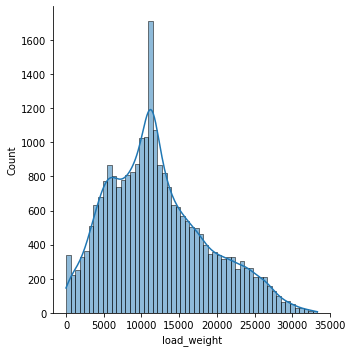

In [69]:
# The general distribution of overall load capacity
sns.displot(df_austin.load_weight, kde=True, label='Load Capacity Waste Collection in Austin')

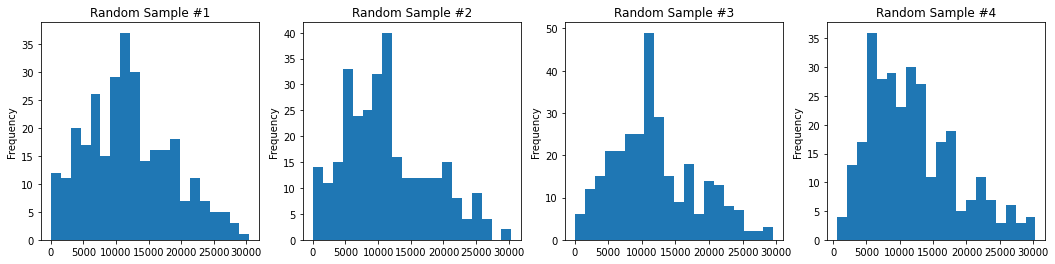

In [70]:
# Checking randomness of sample
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  df_austin.load_weight.sample(300).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Random Sample #{}'.format(i+1))

*b) Hypothesis test: P-Value and T-Statistics*

Hypothesis test will be done into two method: \
- `Daily-based` analysis
- `Monthly based` analysis

Daily-based analysis is by finding daily average and grouped by `report_date`. Meanwhile, Monthly-based analysis is by finding montlhy average and grouped by `month`.

<u>Daily-based Analysis</u>

> The result of daily-based:
- p-value : `0.0002`
- t-stat  : `-3.62`

Daily-based analysis shows there is no significant change from load weight average because the probability is smaller than 0.05 as the parameter of significance. Meanwhile the result of student t-statistic is negative, which means it supports H0 because it is below to the significance of t-statistic table (will not be explained further considering its long explanation).

From daily-based analysis, we can get that **it is not recommended to add new site** based on the data from the first semester of 2021.


In [71]:
df_daily = df_austin.groupby(by=["report_date"]).mean()
df_daily

,load_weight
report_date,
2021-01-01,11300.000000
2021-01-02,13806.518987
2021-01-04,13840.094787
2021-01-05,12697.566138
2021-01-06,13292.032967
...,...
2021-07-05,13267.762238
2021-07-06,11988.727273
2021-07-07,11178.482759


In [72]:
#The p-value divided by 2 since the output is two-sided p-value
t_stat,p_val = stats.ttest_1samp(df_daily.load_weight, 12000)
print('p-value:',p_val/2) 
print('t-statistics:',t_stat)

p-value: 0.00019290355772418895
t-statistics: -3.624123574851593


<u>Monthly-based Analysis</u>

> Monthly-based Analysis
The result of daily-based:
- p-value : `0.03`
- t-stat  : `2.40`

Monthly-based analysis shows there is no significant change from load weight average because the probability is smaller than 0.05 as the parameter of significance, which is lower than 0.05. Meanwhile the result of student t-statistic is positive, however, since the number of data is only 6 rows (from January to June), we can see the [t-Table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf), based on the calculation of t-statistics is significant if the result for this case is above `2.447`. However, the result is 2.40, which is lower than 2.447.

So, from monthly-based analysis, **it is not recommended to add new site** based on the data from the first semester of 2021.

In [73]:
df_month = pd.DataFrame({'month': ["January", "February", "March", "April", "May", "June"],
                         'average_capacity': [mean_jan, mean_feb, mean_mar, mean_apr, mean_may, mean_june]})
df_month

,month,average_capacity
0,January,12116.917702
1,February,12222.651809
2,March,12032.578645
3,April,11944.942214
4,May,12401.762957
5,June,12407.359029


In [74]:
#The p-value divided by 2 since the output is two-sided p-value
t_stat,p_val = stats.ttest_1samp(df_month.average_capacity, 12000)
print('p-value:',p_val/2) 
print('t-statistics:',t_stat)

p-value: 0.030760194988417644
t-statistics: 2.401319122773357


*c) Confidence Interval (CI 90%)*

Confidence Interval is a range of values so defined that there is a specified probability that the value of a parameter lies within it. It can be estimate plus and minus the variation in that estimate. In this case, the load capacity will be estimated, for instance, through CI 90% daily-based and taking `10000` random samples to make the calculation easier.

As we can see the result of confidence interval, there are two results indicating as the minimum and maximum load weight that are recommended to be the capacity for waste collection sites.
- Recommemded minimum capacity: `6724.20` pounds
- Recommended maximum capacity: `15734.88` pounds

In [75]:
# Confidence Interval 90% (Daily-based)
average_capacity_pop = np.random.normal(df_daily.load_weight.mean(), df_daily.load_weight.std(), 10000)

ci = stats.norm.interval(0.90, df_daily.load_weight.mean(), df_daily.load_weight.std())
print(ci)

(6724.19871739672, 15734.88341793932)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


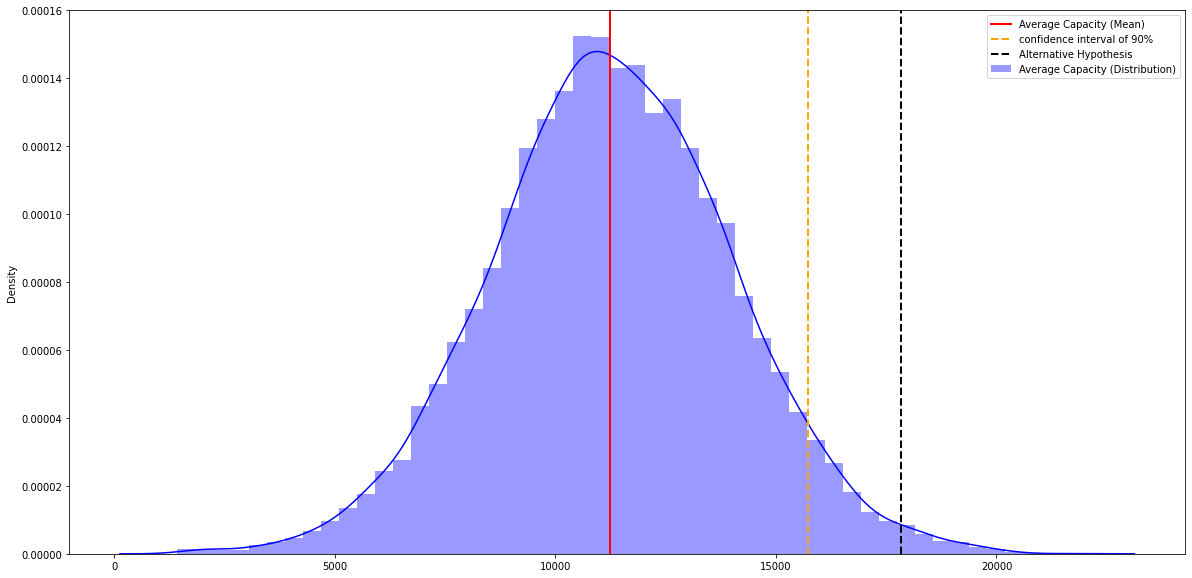

In [76]:
# Plotting histogram for Confidence Interval 90% (Daily-based)
sns.distplot(average_capacity_pop, label='Average Capacity (Distribution)', color='blue')
plt.axvline(df_daily.load_weight.mean(), color='red', linewidth=2, label='Average Capacity (Mean)')
plt.axvline(ci[1], color='orange', linestyle='dashed', linewidth=2, label='confidence interval of 90%')
plt.axvline(average_capacity_pop.mean() + t_stat*df_daily.load_weight.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**5.4. Load Weight Prediction on July 10, 2021**

The same problem happens that governments want to know how much load of waste in `kg` in Austin on the next day, which is July 10 2021. Governments want us to predict its value. The analysis is started by grouping the sum of `load_weight` with `report_date` as daily report.

In [77]:
# Creating variable between report_date and load_weight
df_daily_sum = df_austin.groupby(by=["report_date"]).sum()
df_daily_sum

,load_weight
report_date,
2021-01-01,11300.0
2021-01-02,2181430.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2419150.0
...,...
2021-07-05,1897290.0
2021-07-06,1978140.0
2021-07-07,1620880.0


*Raw prediction*

Raw predicition here is by using the equation provided with the reported date that will be used: `July 8 and July 9 2021`, to predict `July 10 2021`.

However, the results on July 10 2021 is **negative**. It is **not logical** because if the result is negative, that means the truck from waste collection would bring the wastes or garbages to the city. But in reality, it is always trucks bringing wastes and garbages to the waste collection sites. The reason why the result is negative is because of `the incomplete or error data input` on July 9 2021, which creates its value lower than July 8 2021.

We can see the difference from the average:
- July 8: `1,508,050` pounds
- July 9: `126,140` pounds

In [78]:
# Load weight on July 8-9 2021
load_9_7 = df_daily_sum.loc['2021-07-09','load_weight']
load_8_7 = df_daily_sum.loc['2021-07-08','load_weight']
print(f'July 9 2021: {load_9_7} pounds')
print(f'July 8 2021: {load_8_7} pounds')

July 9 2021: 126140.0 pounds
July 8 2021: 1508050.0 pounds


In [79]:
# Original Prediction
load_10_7 = load_9_7 + (load_9_7 - load_8_7)
load_10_7
print(f'July 10 2021: {load_10_7} pounds')

July 10 2021: -1255770.0 pounds


*Make the predicition for July 9 before predicting July 10 2021*

From the raw predicition with negative result, then the analysis is changed by: \
1. Making a `prediction for July 9 2021`, by using `July 7 and 8 2021`.
2. Using `the prediction for July 9 2021` to predict `July 10 2021`.

In [80]:
# Prediction of Load Weight on July 9, 2021
load_7_7 = df_daily_sum.loc['2021-07-07','load_weight']

load_9_7_alt = load_8_7 + (load_8_7 - load_7_7)
load_9_7_alt
print(f'July 9 2021 Prediction: {load_9_7_alt} pounds')

July 9 2021 Prediction: 1395220.0 pounds


In [81]:
# Prediction of Load Weight on July 10, 2021 using July 9 prediction
load_10_7_alt = load_9_7_alt + (load_9_7_alt - load_8_7)
load_10_7_alt
print(f'July 10 2021 Prediction: {load_10_7_alt} pounds')

July 10 2021 Prediction: 1282390.0 pounds


In [82]:
# converting lbs to kg
pounds = load_10_7_alt
kg = pounds/2.2046
print(f'Coverting July 10 2021: {pounds} pounds to kilograms: {kg} kg')

Coverting July 10 2021: 1282390.0 pounds to kilograms: 581688.2881248299 kg


July 10 2021 is predicted to have `1282390.0` pounds or `581688.28 kilograms (kg)`.

---
## **6. Conclusion**

After a long process of data preparation, cleaning, and analysis, we can summarize:

\
**Data Preparation**
> There are `25712` data in the *raw data*, which should be cleaned, such as duplicate data, missing values (null), 0 (zero) value, and extreme values.

\
**Data Cleaning**
> Number of data after cleaning is `25686`, based on subtituting missing value with median, testing the skewness of data, removing extreme values or outliers.
- The chosen method for handling missing values is by subtituting them, instead of removing missing value. This is based on testing data skewness with result is `Right Skewed` which means the distribution of data is mostly at the right side of mean (average) or more than 50% distribution of data `load_weight` are more than average.
- There are `26` outliers availabe and removed from the data, which the most extreme value is `245540` from `TDS LANDFILL`.
- Average load before removing outliers is `12206.72` pounds; average after removing outliers is `12158.49` pounds.

\
**Data Analysis**

From data analysis, we can finally answer problem statements mentioned on Part 2.

**1. What is the current condition of Austin's waste collection and diversion system? (descriptive statistics)** 
> - **Evaluation the load monthly can be useful for waste collection scheduling and diversion system.** The average load weight from January to June 2021, based on overall waste collection sites, has some empty data, indicated by `NaN`. NaN means there are no waste load being dropped to the certain sites during that month.
- The high number of center tendency in TDS Landfill can be the sign that **TDS Landfill is the main waste collection site in Austin**, which can be useful as a reference of the approximate the average load for the new TDS Landfill.

**2. Should Austin, Texas TX governments add new sites for the garbage collection for the whole city? If yes, what kind of new sites that are recommended? If no, explain the reason. (inferential statistics)**
> - **Unnecessary to add new sites**\
It is suggested that **the governments do not have to add new waste collection sites** because of the prediction how much load that would come to the waste collection seem to be the same as the first semester of 2021. This can be evaluated through the significance of probability statistics (indicated by *p-value*)--even from two contexts (daily-based and monthly-based)--the significance probability is lower than the expected value 0.05. Daily-based probability is only `0.0002` and Montly-based probability is `0.03`.
- Load capacity recommendation calculated from **confidence interval 90%**: `6724.20` pounds (min), `15734.88` pounds (max).
- Prediction on July 10, 2021:  `1282390.0` pounds or `581688.28 kilograms (kg)`.

\
**Suggestions**
\
As the analysis is finally concluded, it is suggested to analize from the type of load. The scheduling for waste diversion system should be considered as there are unoptimized usage at some particular collections sites, such as `Onion Creek`, `Park Center`, `St. Edwards` and `Park Center`. Those waste collection sites have potential to be optimized.

On the other words, handling waste collection is not only by adding new collection sites, but also by **scheduling waste diversion system**. This will be useful not only to save more time and energy, but also to minimize the expense to buy new site for waste collection site.

From here, the next analysis would potentially be about the income and expense for waste collection and diversion system.